## Arquitectura de HIVE

HIVE es una aplicación que funciona sobre Hadoop y que permite usar sentencias tipo SQL sobre un cluster Hadoop:

- Transforma sentencias tipo SQL en jobs sobre un cluster Hadoop (usando en algunos casos MapReduce)
- Almacena las tablas como ficheros planos en HDFS


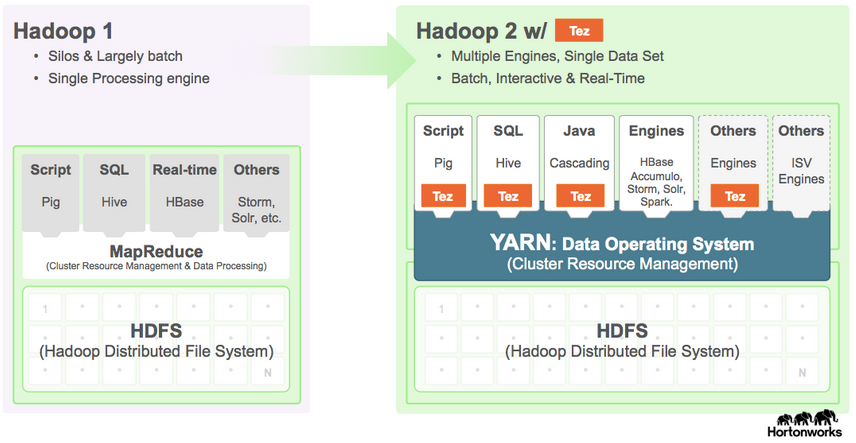

In [7]:
from IPython.display import Image
Image(filename='imgs/hadoop-hive-tez.png') 

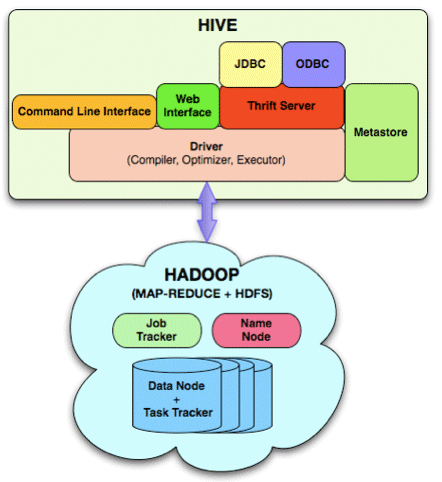

In [8]:
from IPython.display import Image
Image(filename='imgs/hive_architecture.png') 

## HIVE Básico

### arranca primero el servidor de HIVE

desde un terminal

    sudo hadoop-start-hive.sh

### ejemplo con un fichero sencillo

In [1]:
!head -10 data/personas.txt

Deborah A. Hopper,Riparbella,28
Gail K. Caldwell,Vï¿½lklingen,29
Azalia A. Noel,Scarborough,38
Noble N. House,Lexington,20
Dominique U. Landry,Medemblik,22
Declan S. Lynch,Whyalla,61
Nasim W. Faulkner,Bolinne,56
Gage H. Price,Saint-Oyen,25
Emi G. Gilmore,La Rochelle,25
Juliet Z. Burks,Barghe,53


### creamos una tabla

In [27]:
%%script hive cli
drop table personal;
create table personal
(nombre STRING, ciudad STRING, edad BIGINT)
ROW FORMAT DELIMITED
FIELDS TERMINATED BY ','
STORED AS TEXTFILE;

hive> drop table personal;
hive> create table personal
    > (nombre STRING, ciudad STRING, edad BIGINT)
    > ROW FORMAT DELIMITED
    > FIELDS TERMINATED BY ','
    > STORED AS TEXTFILE;
hive> 

15/07/12 09:35:35 WARN conf.HiveConf: HiveConf of name hive.optimize.mapjoin.mapreduce does not exist
15/07/12 09:35:35 WARN conf.HiveConf: HiveConf of name hive.heapsize does not exist
15/07/12 09:35:35 WARN conf.HiveConf: HiveConf of name hive.server2.enable.impersonation does not exist
15/07/12 09:35:35 WARN conf.HiveConf: HiveConf of name hive.auto.convert.sortmerge.join.noconditionaltask does not exist

Logging initialized using configuration in file:/etc/hive/conf/hive-log4j.properties
SLF4J: Class path contains multiple SLF4J bindings.
SLF4J: Found binding in [jar:file:/usr/hdp/2.2.0.0-2041/hadoop/lib/slf4j-log4j12-1.7.5.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: Found binding in [jar:file:/usr/hdp/2.2.0.0-2041/hive/lib/hive-jdbc-0.14.0.2.2.0.0-2041-standalone.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.
SLF4J: Actual binding is of type [org.slf4j.impl.Log4jLoggerFactory]
OK
Time taken: 1

### verificamos que está bien definida

In [28]:
%%script hive cli
describe personal;

hive> describe personal;
nombre              	string              	                    
ciudad              	string              	                    
edad                	bigint              	                    
hive> 

15/07/12 09:37:02 WARN conf.HiveConf: HiveConf of name hive.optimize.mapjoin.mapreduce does not exist
15/07/12 09:37:02 WARN conf.HiveConf: HiveConf of name hive.heapsize does not exist
15/07/12 09:37:02 WARN conf.HiveConf: HiveConf of name hive.server2.enable.impersonation does not exist
15/07/12 09:37:02 WARN conf.HiveConf: HiveConf of name hive.auto.convert.sortmerge.join.noconditionaltask does not exist

Logging initialized using configuration in file:/etc/hive/conf/hive-log4j.properties
SLF4J: Class path contains multiple SLF4J bindings.
SLF4J: Found binding in [jar:file:/usr/hdp/2.2.0.0-2041/hadoop/lib/slf4j-log4j12-1.7.5.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: Found binding in [jar:file:/usr/hdp/2.2.0.0-2041/hive/lib/hive-jdbc-0.14.0.2.2.0.0-2041-standalone.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.
SLF4J: Actual binding is of type [org.slf4j.impl.Log4jLoggerFactory]
OK
Time taken: 5

### cargamos datos a la tabla desde un fichero

In [31]:
%%script hive cli
LOAD DATA LOCAL INPATH 'data/personas.txt' OVERWRITE INTO TABLE personal;

hive> LOAD DATA LOCAL INPATH 'data/personas.txt' OVERWRITE INTO TABLE personal;
hive> 

15/07/12 09:41:48 WARN conf.HiveConf: HiveConf of name hive.optimize.mapjoin.mapreduce does not exist
15/07/12 09:41:48 WARN conf.HiveConf: HiveConf of name hive.heapsize does not exist
15/07/12 09:41:48 WARN conf.HiveConf: HiveConf of name hive.server2.enable.impersonation does not exist
15/07/12 09:41:48 WARN conf.HiveConf: HiveConf of name hive.auto.convert.sortmerge.join.noconditionaltask does not exist

Logging initialized using configuration in file:/etc/hive/conf/hive-log4j.properties
SLF4J: Class path contains multiple SLF4J bindings.
SLF4J: Found binding in [jar:file:/usr/hdp/2.2.0.0-2041/hadoop/lib/slf4j-log4j12-1.7.5.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: Found binding in [jar:file:/usr/hdp/2.2.0.0-2041/hive/lib/hive-jdbc-0.14.0.2.2.0.0-2041-standalone.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.
SLF4J: Actual binding is of type [org.slf4j.impl.Log4jLoggerFactory]
Loading data to 

### vemos cómo organiza HIVE las tablas en HDFS

In [32]:
!hdfs dfs -ls /apps/hive/warehouse

Found 1 items
drwxr-xr-x   - user hdfs          0 2015-07-12 09:42 /apps/hive/warehouse/personal


In [33]:
!hdfs dfs -ls /apps/hive/warehouse/personal

Found 1 items
-rw-r--r--   3 user hdfs       3108 2015-07-12 09:42 /apps/hive/warehouse/personal/personas.txt


### hacemos un select, que HIVE traduce en un job map-reduce de Hadoop

In [36]:
%%script hive cli
SELECT count(*) from personal where edad>40;

hive> SELECT count(*) from personal where edad>40;
63
hive> 

15/07/12 09:54:01 WARN conf.HiveConf: HiveConf of name hive.optimize.mapjoin.mapreduce does not exist
15/07/12 09:54:01 WARN conf.HiveConf: HiveConf of name hive.heapsize does not exist
15/07/12 09:54:01 WARN conf.HiveConf: HiveConf of name hive.server2.enable.impersonation does not exist
15/07/12 09:54:01 WARN conf.HiveConf: HiveConf of name hive.auto.convert.sortmerge.join.noconditionaltask does not exist

Logging initialized using configuration in file:/etc/hive/conf/hive-log4j.properties
SLF4J: Class path contains multiple SLF4J bindings.
SLF4J: Found binding in [jar:file:/usr/hdp/2.2.0.0-2041/hadoop/lib/slf4j-log4j12-1.7.5.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: Found binding in [jar:file:/usr/hdp/2.2.0.0-2041/hive/lib/hive-jdbc-0.14.0.2.2.0.0-2041-standalone.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.
SLF4J: Actual binding is of type [org.slf4j.impl.Log4jLoggerFactory]
Query ID = user_

### inspeccionamos el plan de ejecución que realizó HIVE del query anterior

In [2]:
%%script hive cli
EXPLAIN SELECT count(*) from personal where edad>40;

hive> EXPLAIN SELECT count(*) from personal where edad>40;
STAGE DEPENDENCIES:
  Stage-1 is a root stage
  Stage-0 depends on stages: Stage-1

STAGE PLANS:
  Stage: Stage-1
    Map Reduce
      Map Operator Tree:
          TableScan
            alias: personal
            filterExpr: (edad > 40) (type: boolean)
            Statistics: Num rows: 388 Data size: 3108 Basic stats: COMPLETE Column stats: NONE
            Filter Operator
              predicate: (edad > 40) (type: boolean)
              Statistics: Num rows: 129 Data size: 1033 Basic stats: COMPLETE Column stats: NONE
              Select Operator
                Statistics: Num rows: 129 Data size: 1033 Basic stats: COMPLETE Column stats: NONE
                Group By Operator
                  aggregations: count()
                  mode: hash
                  outputColumnNames: _col0
                  Statistics: Num rows: 1 Data size: 8 Basic stats: COMPLETE Column stats: NONE
                  Reduce Output Operator
  

15/07/12 10:22:08 WARN conf.HiveConf: HiveConf of name hive.optimize.mapjoin.mapreduce does not exist
15/07/12 10:22:08 WARN conf.HiveConf: HiveConf of name hive.heapsize does not exist
15/07/12 10:22:08 WARN conf.HiveConf: HiveConf of name hive.server2.enable.impersonation does not exist
15/07/12 10:22:08 WARN conf.HiveConf: HiveConf of name hive.auto.convert.sortmerge.join.noconditionaltask does not exist

Logging initialized using configuration in file:/etc/hive/conf/hive-log4j.properties
SLF4J: Class path contains multiple SLF4J bindings.
SLF4J: Found binding in [jar:file:/usr/hdp/2.2.0.0-2041/hadoop/lib/slf4j-log4j12-1.7.5.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: Found binding in [jar:file:/usr/hdp/2.2.0.0-2041/hive/lib/hive-jdbc-0.14.0.2.2.0.0-2041-standalone.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.
SLF4J: Actual binding is of type [org.slf4j.impl.Log4jLoggerFactory]
OK
Time taken: 8

Verifica en el [Application Status](http://localhost:8188/applicationhistory) cómo el comando HIVE que acabamos de ejecutar se transformó en un job map-reduce de Hadoop.

### Hacemos otro query

In [37]:
%%script hive clie
SELECT nombre from personal WHERE edad>20 and edad<40;

hive> SELECT nombre from personal WHERE edad>20 and edad<40;
Deborah A. Hopper
Gail K. Caldwell
Azalia A. Noel
Dominique U. Landry
Gage H. Price
Emi G. Gilmore
Slade H. Holloway
Geoffrey Z. Webster
Blossom V. Oneal
Moana V. Wagner
Jerry B. Mendez
Vera Y. Keller
Castor F. Medina
Luke I. Hoffman
Kirk H. Brooks
Abbot O. Alvarez
Brendan X. Lyons
Constance A. Willis
Aline L. Morrow
Zelda L. Downs
Carl T. Hopper
Beatrice Z. Murray
Tasha B. Reilly
Alfreda V. Mitchell
Nita S. Sharpe
Gage H. Strong
Lamar O. Hobbs
Xanthus Y. Matthews
Kieran F. Marks
Cheryl L. Roy
Nola X. Griffin
Cameran H. Combs
Yael L. Cox
hive> 

15/07/12 09:57:45 WARN conf.HiveConf: HiveConf of name hive.optimize.mapjoin.mapreduce does not exist
15/07/12 09:57:45 WARN conf.HiveConf: HiveConf of name hive.heapsize does not exist
15/07/12 09:57:45 WARN conf.HiveConf: HiveConf of name hive.server2.enable.impersonation does not exist
15/07/12 09:57:45 WARN conf.HiveConf: HiveConf of name hive.auto.convert.sortmerge.join.noconditionaltask does not exist

Logging initialized using configuration in file:/etc/hive/conf/hive-log4j.properties
SLF4J: Class path contains multiple SLF4J bindings.
SLF4J: Found binding in [jar:file:/usr/hdp/2.2.0.0-2041/hadoop/lib/slf4j-log4j12-1.7.5.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: Found binding in [jar:file:/usr/hdp/2.2.0.0-2041/hive/lib/hive-jdbc-0.14.0.2.2.0.0-2041-standalone.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.
SLF4J: Actual binding is of type [org.slf4j.impl.Log4jLoggerFactory]
OK
Time taken: 1

### En este caso HIVE usa Tez y YARN sin necesitar Map-Reduce

In [3]:
%%script hive clie
EXPLAIN SELECT nombre from personal WHERE edad>20 and edad<40;

hive> EXPLAIN SELECT nombre from personal WHERE edad>20 and edad<40;
STAGE DEPENDENCIES:
  Stage-0 is a root stage

STAGE PLANS:
  Stage: Stage-0
    Fetch Operator
      limit: -1
      Processor Tree:
        TableScan
          alias: personal
          filterExpr: ((edad > 20) and (edad < 40)) (type: boolean)
          Statistics: Num rows: 28 Data size: 3108 Basic stats: COMPLETE Column stats: NONE
          Filter Operator
            predicate: ((edad > 20) and (edad < 40)) (type: boolean)
            Statistics: Num rows: 3 Data size: 333 Basic stats: COMPLETE Column stats: NONE
            Select Operator
              expressions: nombre (type: string)
              outputColumnNames: _col0
              Statistics: Num rows: 3 Data size: 333 Basic stats: COMPLETE Column stats: NONE
              ListSink

hive> 

15/07/12 10:22:53 WARN conf.HiveConf: HiveConf of name hive.optimize.mapjoin.mapreduce does not exist
15/07/12 10:22:53 WARN conf.HiveConf: HiveConf of name hive.heapsize does not exist
15/07/12 10:22:54 WARN conf.HiveConf: HiveConf of name hive.server2.enable.impersonation does not exist
15/07/12 10:22:54 WARN conf.HiveConf: HiveConf of name hive.auto.convert.sortmerge.join.noconditionaltask does not exist

Logging initialized using configuration in file:/etc/hive/conf/hive-log4j.properties
SLF4J: Class path contains multiple SLF4J bindings.
SLF4J: Found binding in [jar:file:/usr/hdp/2.2.0.0-2041/hadoop/lib/slf4j-log4j12-1.7.5.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: Found binding in [jar:file:/usr/hdp/2.2.0.0-2041/hive/lib/hive-jdbc-0.14.0.2.2.0.0-2041-standalone.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.
SLF4J: Actual binding is of type [org.slf4j.impl.Log4jLoggerFactory]
OK
Time taken: 1

## Particiones

In [9]:
!cat data/user-posts-US.txt

user1,Funny Story,1343182026191
user2,Cool Deal,1343182133839
user4,Interesting Post,1343182154633
user5,Yet Another Blog,13431839394


In [10]:
!cat data/user-posts-CO.txt

user6,Ocurrencia,134318202681
user6,Vendo moto,1343182192
user7,Historia,1343182109
user8,Mi blog,134318399


In [11]:
%%script hive cli
drop table posts;
CREATE TABLE posts (user STRING, post STRING, time BIGINT)
PARTITIONED BY(country STRING)
ROW FORMAT DELIMITED
FIELDS TERMINATED BY ','
STORED AS TEXTFILE;

hive> drop table posts;
hive> CREATE TABLE posts (user STRING, post STRING, time BIGINT)
    > PARTITIONED BY(country STRING)
    > ROW FORMAT DELIMITED
    > FIELDS TERMINATED BY ','
    > STORED AS TEXTFILE;
hive> 

15/07/12 12:12:23 WARN conf.HiveConf: HiveConf of name hive.optimize.mapjoin.mapreduce does not exist
15/07/12 12:12:23 WARN conf.HiveConf: HiveConf of name hive.heapsize does not exist
15/07/12 12:12:23 WARN conf.HiveConf: HiveConf of name hive.server2.enable.impersonation does not exist
15/07/12 12:12:23 WARN conf.HiveConf: HiveConf of name hive.auto.convert.sortmerge.join.noconditionaltask does not exist

Logging initialized using configuration in file:/etc/hive/conf/hive-log4j.properties
SLF4J: Class path contains multiple SLF4J bindings.
SLF4J: Found binding in [jar:file:/usr/hdp/2.2.0.0-2041/hadoop/lib/slf4j-log4j12-1.7.5.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: Found binding in [jar:file:/usr/hdp/2.2.0.0-2041/hive/lib/hive-jdbc-0.14.0.2.2.0.0-2041-standalone.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.
SLF4J: Actual binding is of type [org.slf4j.impl.Log4jLoggerFactory]
OK
Time taken: 9

In [13]:
%%script hive cli
LOAD DATA LOCAL INPATH 'data/user-posts-CO.txt' OVERWRITE INTO TABLE posts PARTITION(country='CO');
LOAD DATA LOCAL INPATH 'data/user-posts-US.txt' OVERWRITE INTO TABLE posts PARTITION(country='US');
LOAD DATA LOCAL INPATH 'data/user-posts-FR.txt' OVERWRITE INTO TABLE posts PARTITION(country='FR');

hive> LOAD DATA LOCAL INPATH 'data/user-posts-CO.txt' OVERWRITE INTO TABLE posts PARTITION(country='CO');
hive> LOAD DATA LOCAL INPATH 'data/user-posts-US.txt' OVERWRITE INTO TABLE posts PARTITION(country='US');
hive> LOAD DATA LOCAL INPATH 'data/user-posts-FR.txt' OVERWRITE INTO TABLE posts PARTITION(country='FR');
hive> 

15/07/12 12:23:46 WARN conf.HiveConf: HiveConf of name hive.optimize.mapjoin.mapreduce does not exist
15/07/12 12:23:46 WARN conf.HiveConf: HiveConf of name hive.heapsize does not exist
15/07/12 12:23:46 WARN conf.HiveConf: HiveConf of name hive.server2.enable.impersonation does not exist
15/07/12 12:23:46 WARN conf.HiveConf: HiveConf of name hive.auto.convert.sortmerge.join.noconditionaltask does not exist

Logging initialized using configuration in file:/etc/hive/conf/hive-log4j.properties
SLF4J: Class path contains multiple SLF4J bindings.
SLF4J: Found binding in [jar:file:/usr/hdp/2.2.0.0-2041/hadoop/lib/slf4j-log4j12-1.7.5.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: Found binding in [jar:file:/usr/hdp/2.2.0.0-2041/hive/lib/hive-jdbc-0.14.0.2.2.0.0-2041-standalone.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.
SLF4J: Actual binding is of type [org.slf4j.impl.Log4jLoggerFactory]
Loading data to 

In [19]:
%%script hive cli
describe posts;

hive> describe posts;
user                	string              	                    
post                	string              	                    
time                	bigint              	                    
country             	string              	                    
	 	 
# Partition Information	 	 
# col_name            	data_type           	comment             
	 	 
country             	string              	                    
hive> 

15/07/12 12:30:57 WARN conf.HiveConf: HiveConf of name hive.optimize.mapjoin.mapreduce does not exist
15/07/12 12:30:57 WARN conf.HiveConf: HiveConf of name hive.heapsize does not exist
15/07/12 12:30:57 WARN conf.HiveConf: HiveConf of name hive.server2.enable.impersonation does not exist
15/07/12 12:30:57 WARN conf.HiveConf: HiveConf of name hive.auto.convert.sortmerge.join.noconditionaltask does not exist

Logging initialized using configuration in file:/etc/hive/conf/hive-log4j.properties
SLF4J: Class path contains multiple SLF4J bindings.
SLF4J: Found binding in [jar:file:/usr/hdp/2.2.0.0-2041/hadoop/lib/slf4j-log4j12-1.7.5.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: Found binding in [jar:file:/usr/hdp/2.2.0.0-2041/hive/lib/hive-jdbc-0.14.0.2.2.0.0-2041-standalone.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.
SLF4J: Actual binding is of type [org.slf4j.impl.Log4jLoggerFactory]
OK
Time taken: 6

In [16]:
%%script hive cli
SELECT * from posts;

hive> SELECT * from posts;
user6	Ocurrencia	134318202681	CO
user6	Vendo moto	1343182192	CO
user7	Historia	1343182109	CO
user8	Mi blog	134318399	CO
utilisateur32	voiture usée	1343182026291	FR
utilisateur21	vends maison	1343182026333	FR
utilisateur90	cherche chien	1343182026891	FR
utilisateur7	mon travail	1343182026999	FR
user1	Funny Story	1343182026191	US
user2	Cool Deal	1343182133839	US
user4	Interesting Post	1343182154633	US
user5	Yet Another Blog	13431839394	US
hive> 

15/07/12 12:26:31 WARN conf.HiveConf: HiveConf of name hive.optimize.mapjoin.mapreduce does not exist
15/07/12 12:26:31 WARN conf.HiveConf: HiveConf of name hive.heapsize does not exist
15/07/12 12:26:31 WARN conf.HiveConf: HiveConf of name hive.server2.enable.impersonation does not exist
15/07/12 12:26:31 WARN conf.HiveConf: HiveConf of name hive.auto.convert.sortmerge.join.noconditionaltask does not exist

Logging initialized using configuration in file:/etc/hive/conf/hive-log4j.properties
SLF4J: Class path contains multiple SLF4J bindings.
SLF4J: Found binding in [jar:file:/usr/hdp/2.2.0.0-2041/hadoop/lib/slf4j-log4j12-1.7.5.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: Found binding in [jar:file:/usr/hdp/2.2.0.0-2041/hive/lib/hive-jdbc-0.14.0.2.2.0.0-2041-standalone.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.
SLF4J: Actual binding is of type [org.slf4j.impl.Log4jLoggerFactory]
OK
Time taken: 6

In [24]:
%%script hive cli
SELECT * from posts where country="US";

hive> SELECT * from posts where country="US";
user1	Funny Story	1343182026191	US
user2	Cool Deal	1343182133839	US
user4	Interesting Post	1343182154633	US
user5	Yet Another Blog	13431839394	US
hive> 

15/07/12 12:35:03 WARN conf.HiveConf: HiveConf of name hive.optimize.mapjoin.mapreduce does not exist
15/07/12 12:35:03 WARN conf.HiveConf: HiveConf of name hive.heapsize does not exist
15/07/12 12:35:03 WARN conf.HiveConf: HiveConf of name hive.server2.enable.impersonation does not exist
15/07/12 12:35:03 WARN conf.HiveConf: HiveConf of name hive.auto.convert.sortmerge.join.noconditionaltask does not exist

Logging initialized using configuration in file:/etc/hive/conf/hive-log4j.properties
SLF4J: Class path contains multiple SLF4J bindings.
SLF4J: Found binding in [jar:file:/usr/hdp/2.2.0.0-2041/hadoop/lib/slf4j-log4j12-1.7.5.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: Found binding in [jar:file:/usr/hdp/2.2.0.0-2041/hive/lib/hive-jdbc-0.14.0.2.2.0.0-2041-standalone.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.
SLF4J: Actual binding is of type [org.slf4j.impl.Log4jLoggerFactory]
OK
Time taken: 1

In [18]:
%%script hive
show partitions posts;

hive> show partitions posts;
country=CO
country=FR
country=US
hive> 

15/07/12 12:30:23 WARN conf.HiveConf: HiveConf of name hive.optimize.mapjoin.mapreduce does not exist
15/07/12 12:30:23 WARN conf.HiveConf: HiveConf of name hive.heapsize does not exist
15/07/12 12:30:23 WARN conf.HiveConf: HiveConf of name hive.server2.enable.impersonation does not exist
15/07/12 12:30:23 WARN conf.HiveConf: HiveConf of name hive.auto.convert.sortmerge.join.noconditionaltask does not exist

Logging initialized using configuration in file:/etc/hive/conf/hive-log4j.properties
SLF4J: Class path contains multiple SLF4J bindings.
SLF4J: Found binding in [jar:file:/usr/hdp/2.2.0.0-2041/hadoop/lib/slf4j-log4j12-1.7.5.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: Found binding in [jar:file:/usr/hdp/2.2.0.0-2041/hive/lib/hive-jdbc-0.14.0.2.2.0.0-2041-standalone.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.
SLF4J: Actual binding is of type [org.slf4j.impl.Log4jLoggerFactory]
OK
Time taken: 9

In [20]:
!hdfs dfs -ls /apps/hive/warehouse

Found 2 items
drwxr-xr-x   - user hdfs          0 2015-07-12 09:42 /apps/hive/warehouse/personal
drwxr-xr-x   - user hdfs          0 2015-07-12 12:24 /apps/hive/warehouse/posts


In [21]:
!hdfs dfs -ls /apps/hive/warehouse/posts

Found 3 items
drwxr-xr-x   - user hdfs          0 2015-07-12 12:24 /apps/hive/warehouse/posts/country=CO
drwxr-xr-x   - user hdfs          0 2015-07-12 12:24 /apps/hive/warehouse/posts/country=FR
drwxr-xr-x   - user hdfs          0 2015-07-12 12:24 /apps/hive/warehouse/posts/country=US


In [22]:
!hdfs dfs -ls /apps/hive/warehouse/posts/country=CO

Found 1 items
-rw-r--r--   3 user hdfs        108 2015-07-12 12:24 /apps/hive/warehouse/posts/country=CO/user-posts-CO.txt
